In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/ajay/Desktop/2025/projects/House_Price_Prediction/HousingData.csv')

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
df.fillna({
    "CRIM": df["CRIM"].mean(),
    "ZN": df["ZN"].mean(),
    "INDUS": df["INDUS"].mean(),
    "AGE": df["AGE"].mean(),
    "LSTAT": df["LSTAT"].mean(),
    "CHAS": df["CHAS"].mode()[0]
}, inplace=True)

In [7]:
df["CHAS"] = df["CHAS"].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [8]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

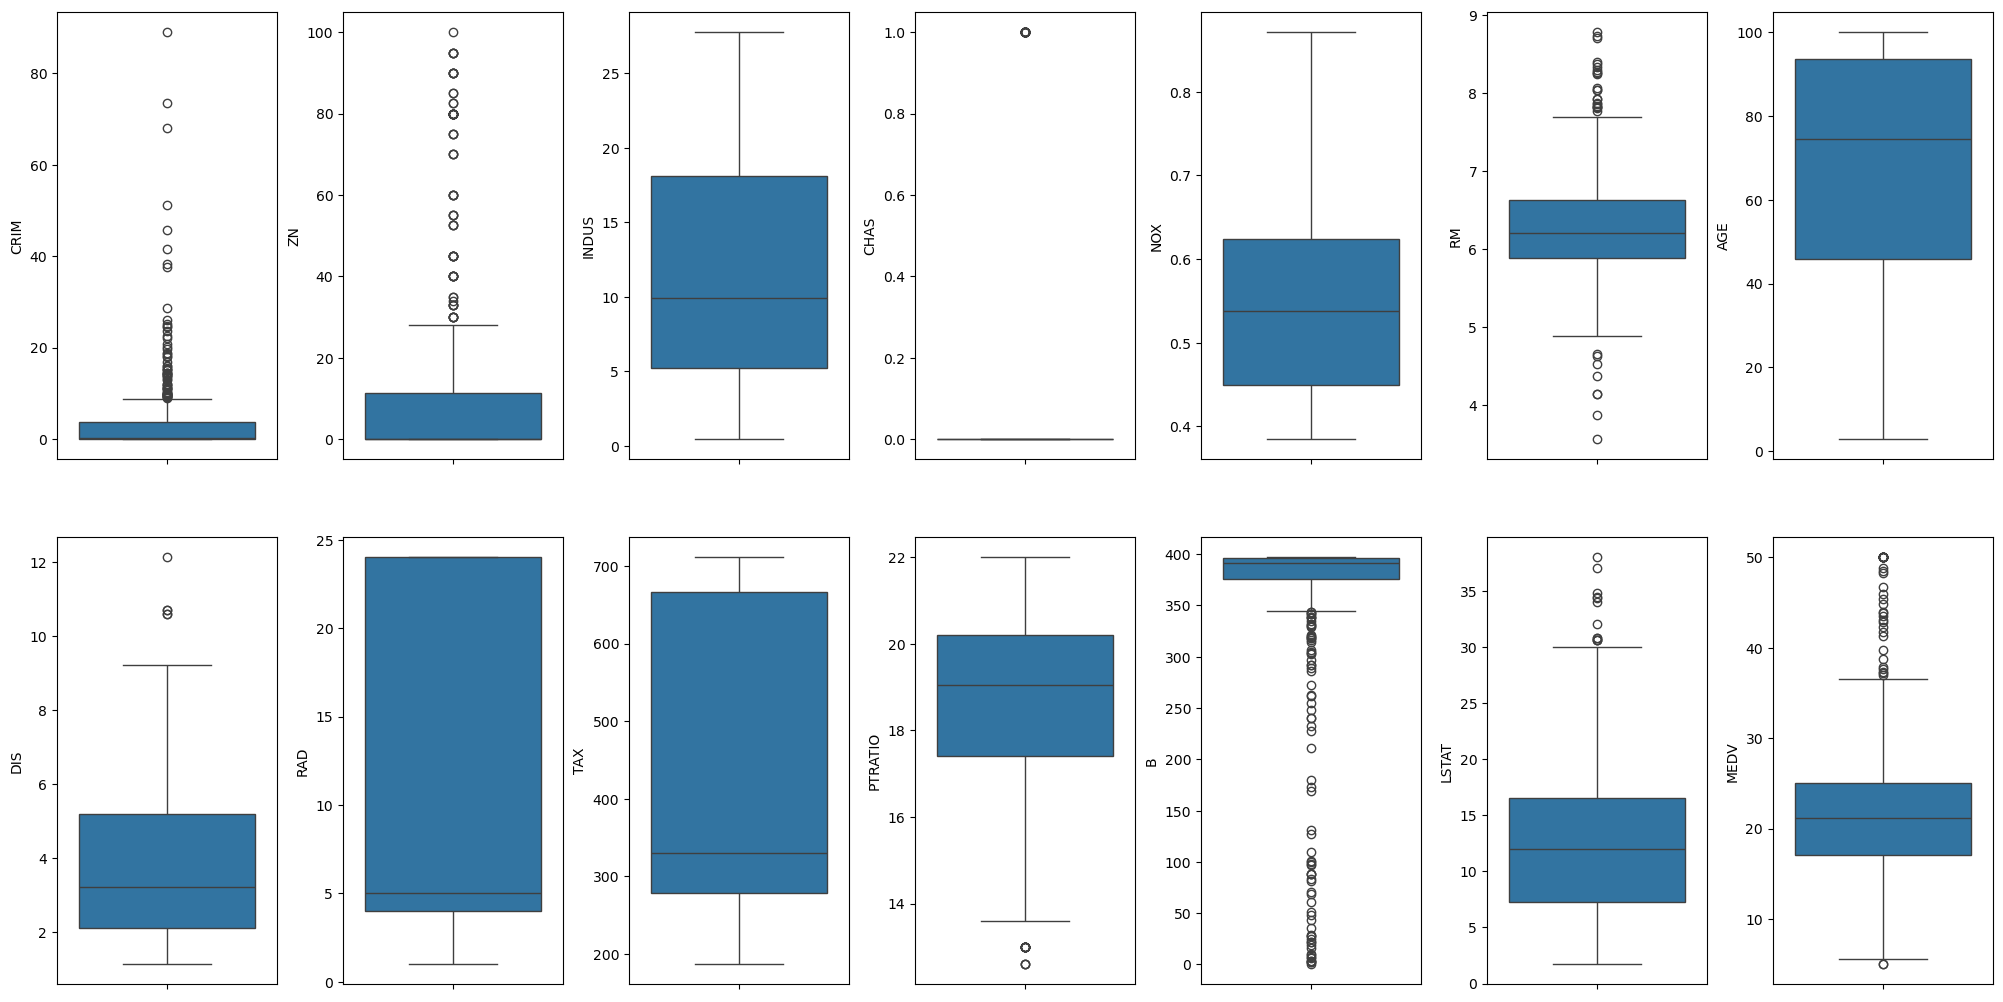

In [9]:
# create plots

fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.6, w_pad=0.7, h_pad=5.0)

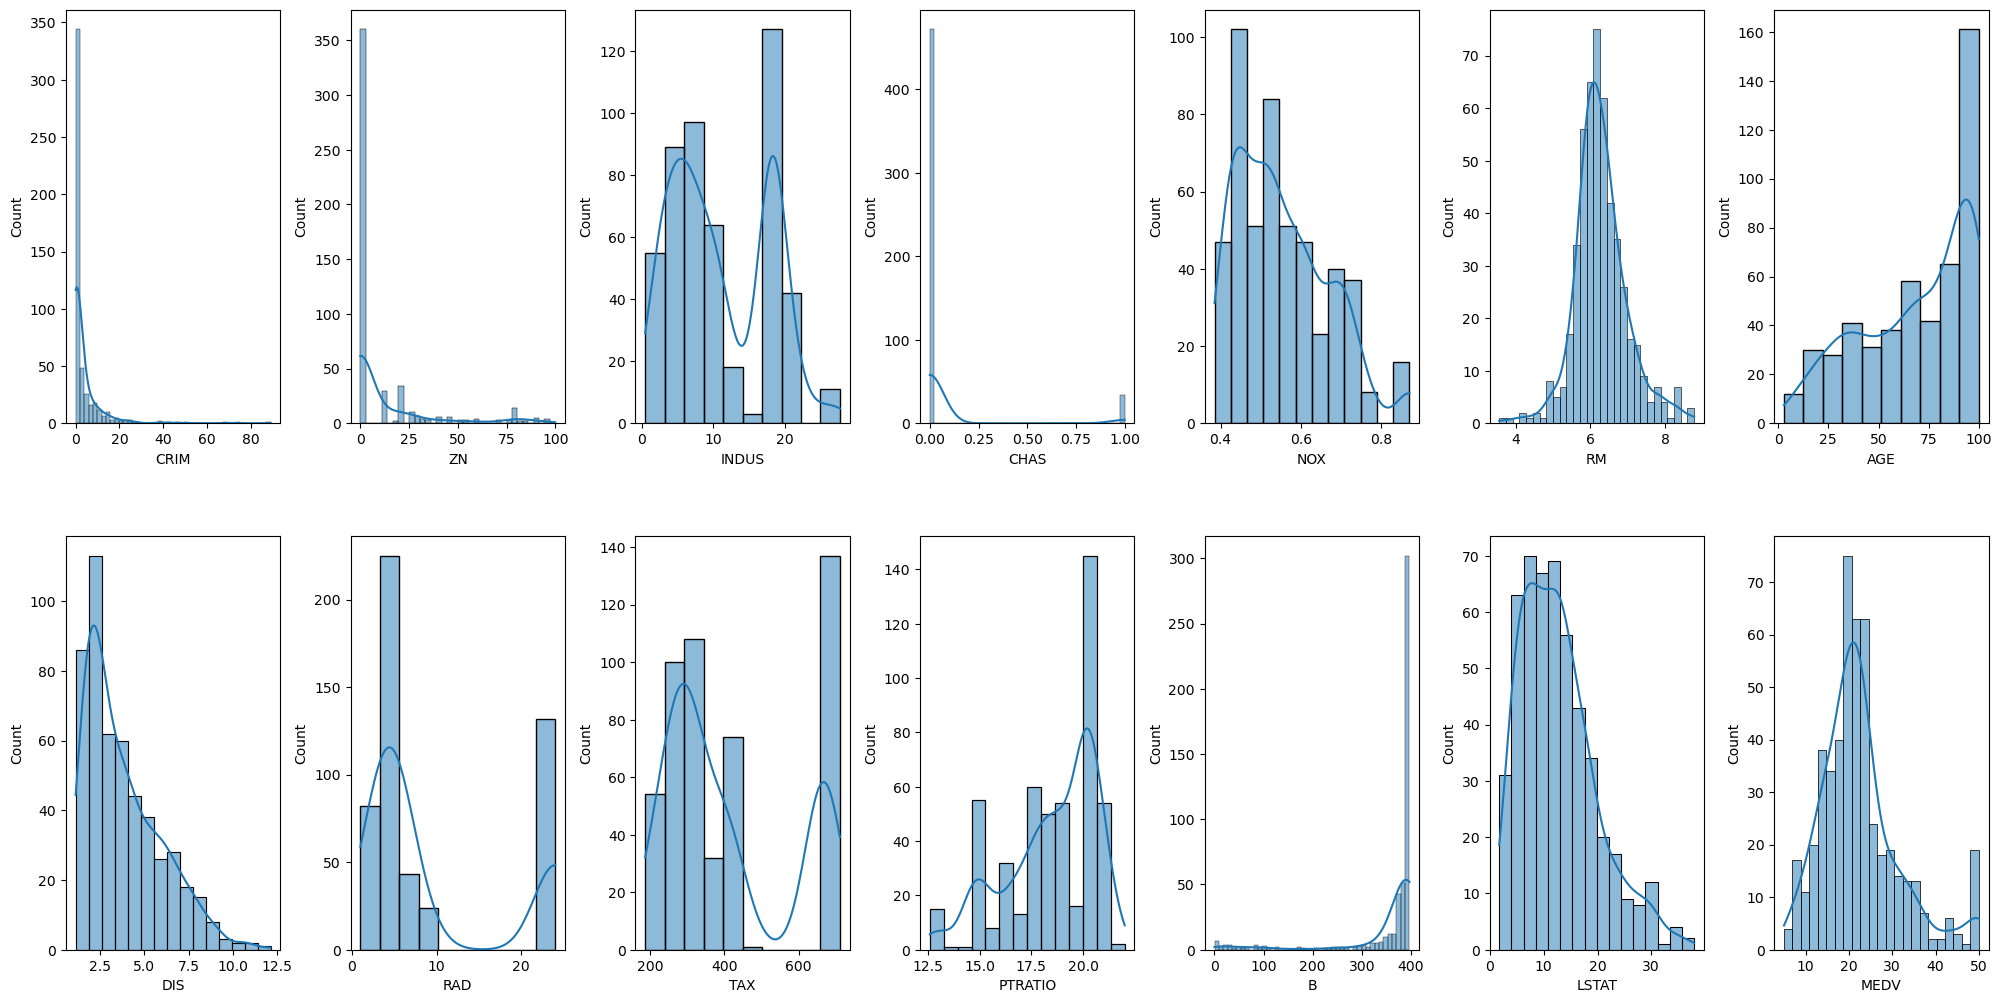

In [10]:
# create dist lots

fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
ax = ax.flatten()

for index, (col, value) in enumerate(df.items()):
    sns.histplot(value, kde=True, ax=ax[index])

plt.tight_layout(pad=0.6, w_pad=0.7, h_pad=5.0)

In [11]:
# min-max normalization

cols = ['CRIM', 'ZN', 'TAX', 'B']
for col in cols:
    minimum = min(df[col])
    maximun = max(df[col])
    df[col] = (df[col] - minimum) / (maximun - minimum)

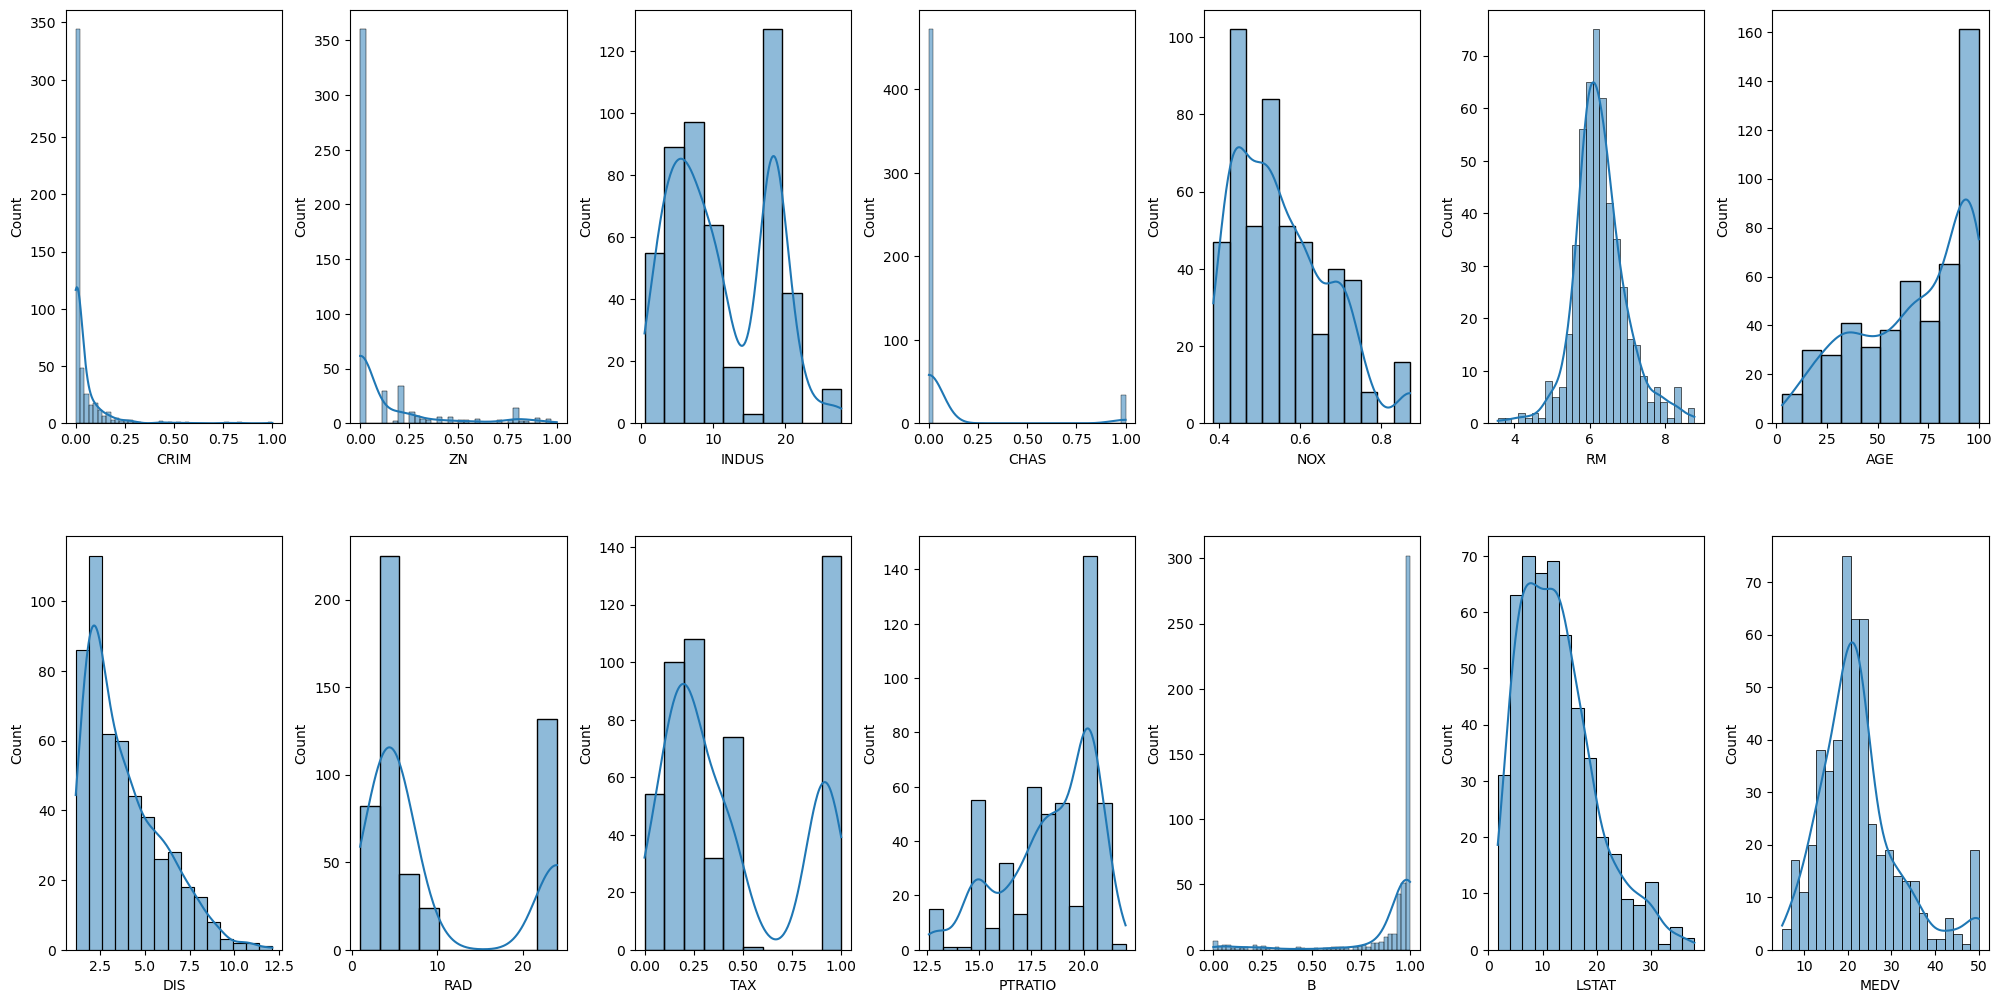

In [12]:
# create dist lots

fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
ax = ax.flatten()

for index, (col, value) in enumerate(df.items()):
    sns.histplot(value, kde=True, ax=ax[index])

plt.tight_layout(pad=0.6, w_pad=0.7, h_pad=5.0)

In [13]:
#standardization

from sklearn import preprocessing

scalar = preprocessing.StandardScaler()

#fit our data
scaled_cols = scalar.fit_transform(df[cols])
scaled_cols = pd.DataFrame(scaled_cols, columns=cols)
scaled_cols.head()

,CRIM,ZN,TAX,B
0,-0.422328,0.296443,-0.666608,0.441052
1,-0.419870,-0.489639,-0.987329,0.441052
2,-0.419872,-0.489639,-0.987329,0.396427
3,-0.419277,-0.489639,-1.106115,0.416163
4,-0.414981,-0.489639,-1.106115,0.441052


In [14]:
for col in cols:
    df[col] = scaled_cols[col]

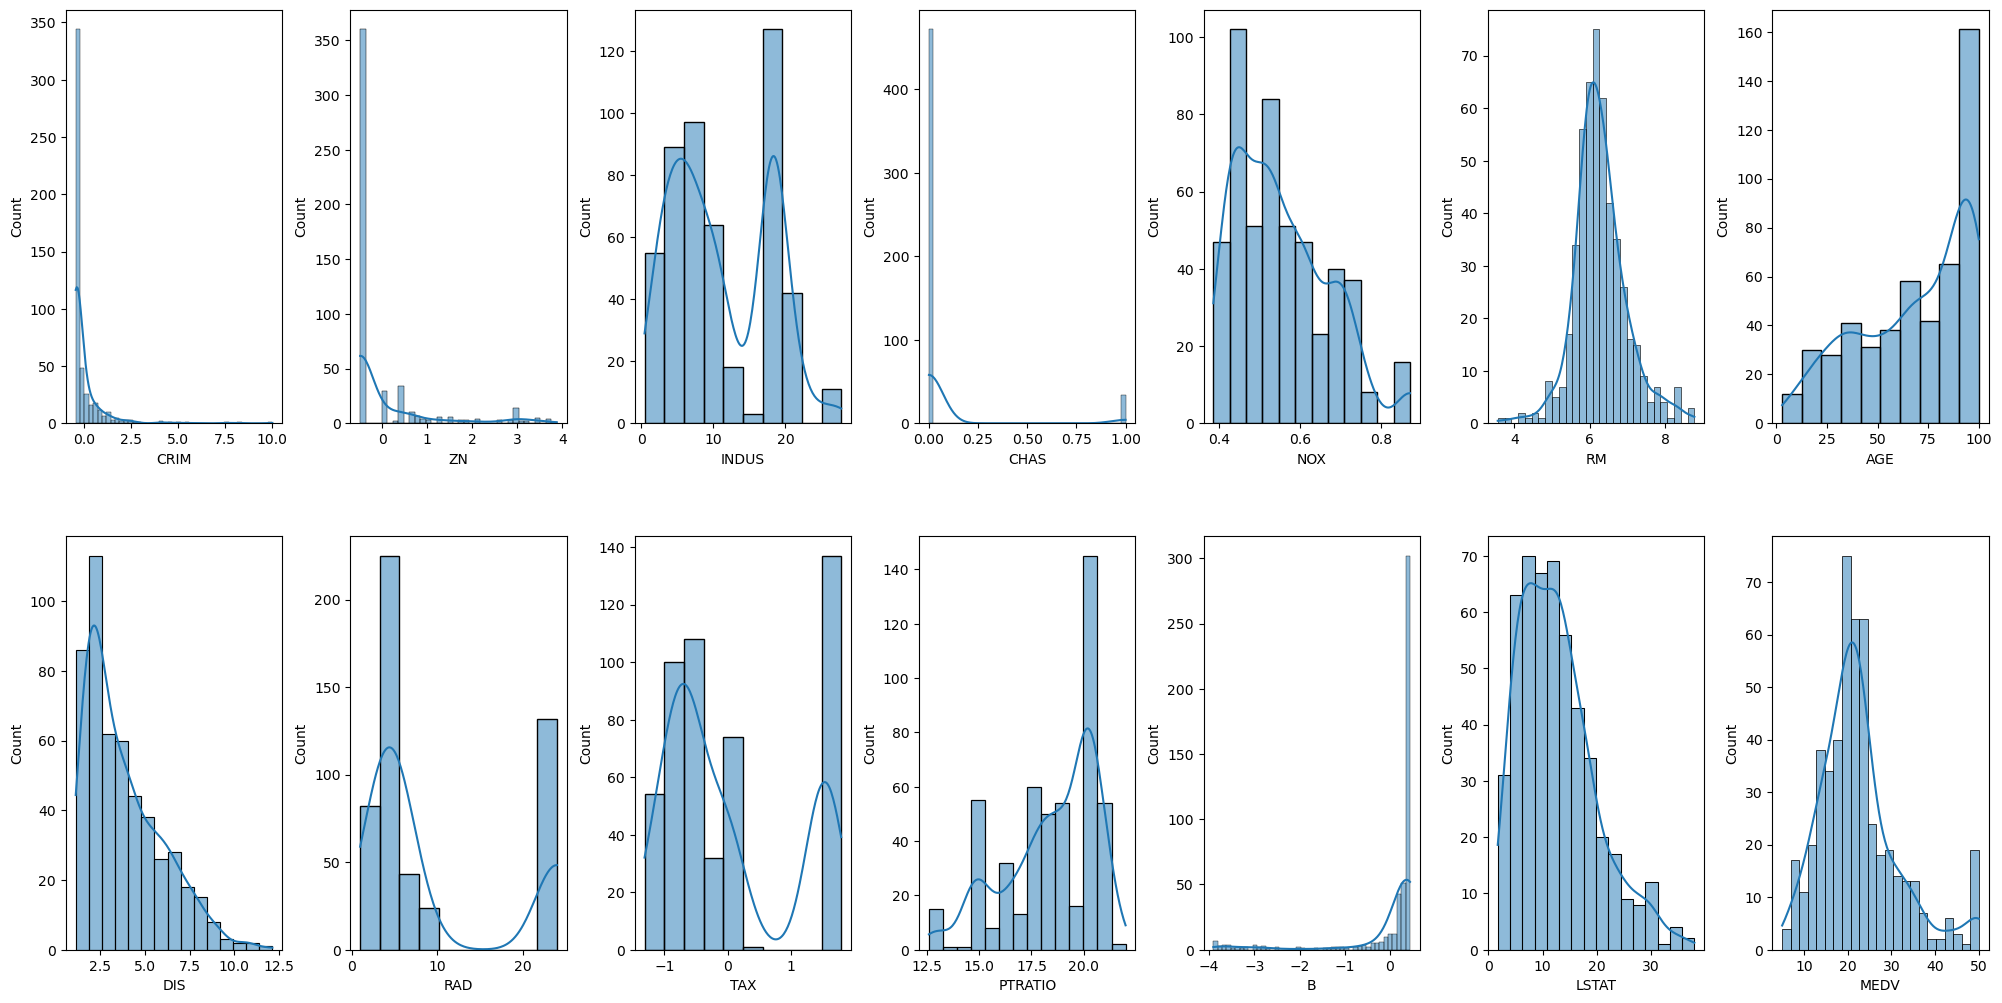

In [15]:
# create dist lots

fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
ax = ax.flatten()

for index, (col, value) in enumerate(df.items()):
    sns.histplot(value, kde=True, ax=ax[index])

plt.tight_layout(pad=0.6, w_pad=0.7, h_pad=5.0)

<Axes: >

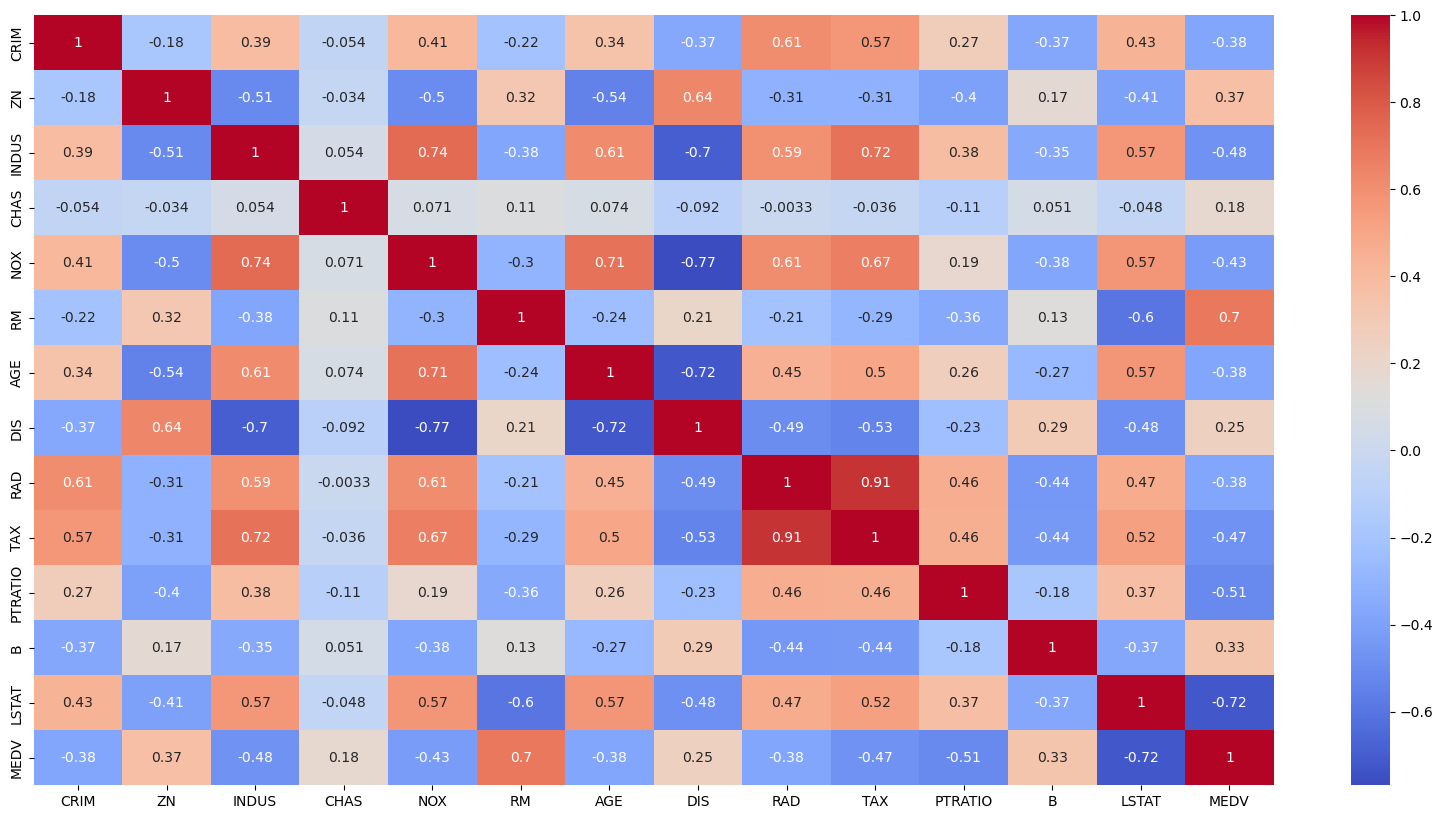

In [19]:
# coorelation matrix

corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

<Axes: xlabel='LSTAT', ylabel='MEDV'>

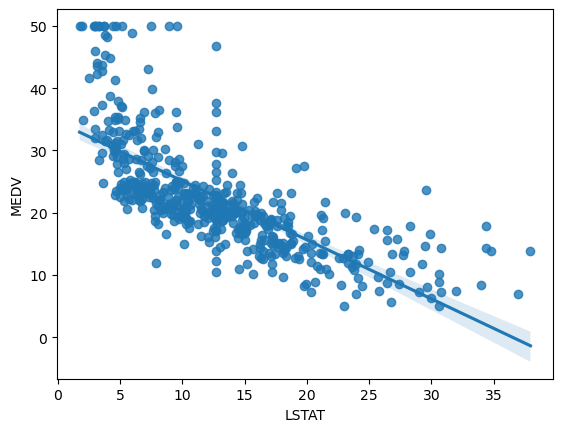

In [20]:
sns.regplot(y=df['MEDV'], x=df['LSTAT'])

<Axes: xlabel='RM', ylabel='MEDV'>

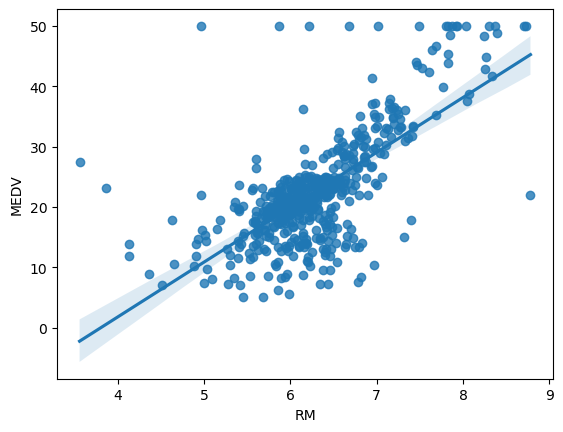

In [21]:
sns.regplot(y=df['MEDV'], x=df['RM'])

In [22]:
# input split

x = df.drop(columns=['MEDV', 'RAD'], axis=1)
y = df['MEDV']

In [23]:
# Model Training

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
def train(model, x, y):
    # train the model
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
    model.fit(x_train, y_train)
    
    # predict the training set
    pred = model.predict(x_test)
    
    # perform cross-validation
    cv_score = cross_val_score(model, x, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    print("model Report")
    print("MSE: ",mean_squared_error(y_test, pred))
    print('CV Score: ', cv_score)

model Report
MSE:  23.942800645628797
CV Score:  35.891929230861884


<Axes: title={'center': 'Model Coefficient'}>

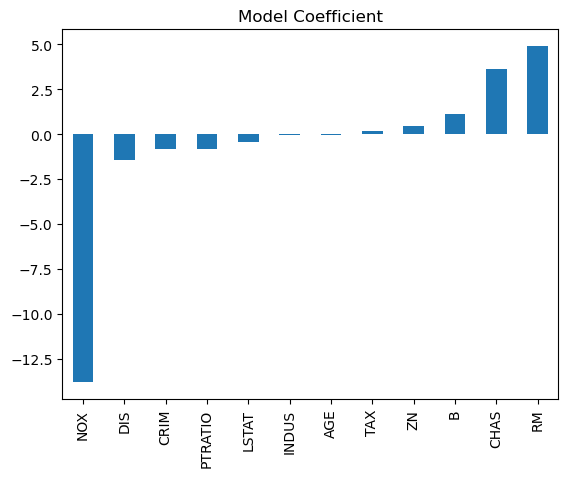

In [26]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
train(model, x, y)
coef = pd.Series(model.coef_, x.columns).sort_values()
coef.plot(kind='bar', title='Model Coefficient')

model Report
MSE:  24.60622047244095
CV Score:  42.80659619491361


<Axes: title={'center': 'Feature Importance'}>

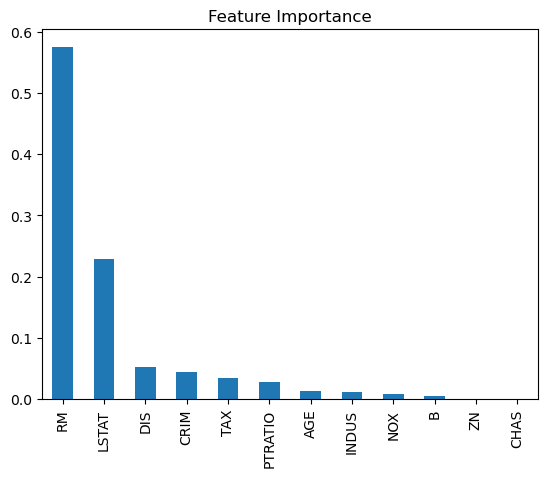

In [27]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, x, y)
coef = pd.Series(model.feature_importances_, x.columns).sort_values(ascending=False)
coef.plot(kind='bar', title='Feature Importance')

model Report
MSE:  8.838776456692914
CV Score:  22.68980651463792


<Axes: title={'center': 'Feature Importance'}>

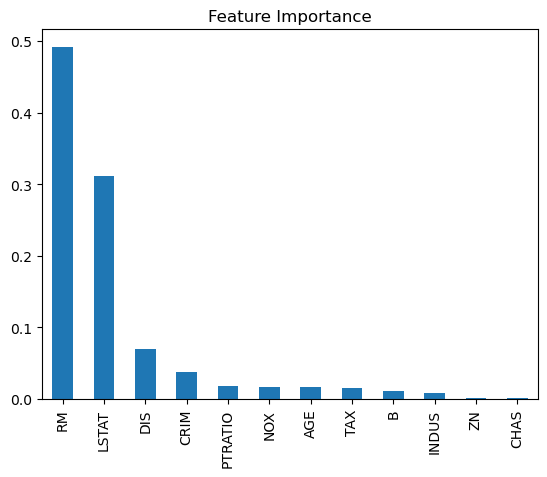

In [28]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
train(model, x, y)
coef = pd.Series(model.feature_importances_, x.columns).sort_values(ascending=False)
coef.plot(kind='bar', title='Feature Importance')

model Report
MSE:  11.205360125984258
CV Score:  20.928810020908553


<Axes: title={'center': 'Feature Importance'}>

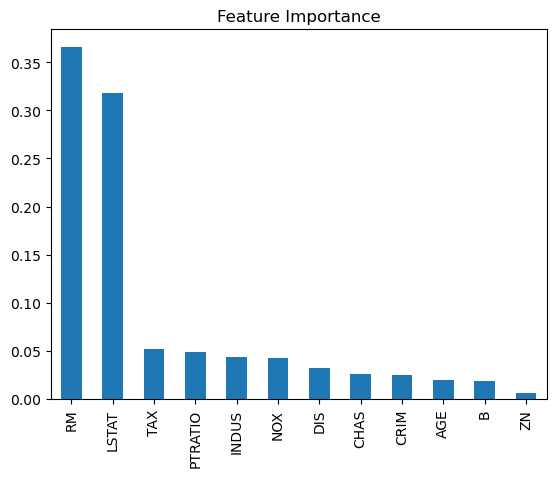

In [29]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
train(model, x, y)
coef = pd.Series(model.feature_importances_, x.columns).sort_values(ascending=False)
coef.plot(kind='bar', title='Feature Importance')

model Report
MSE:  8.17057999581705
CV Score:  25.952922532612536


<Axes: title={'center': 'Feature Importance'}>

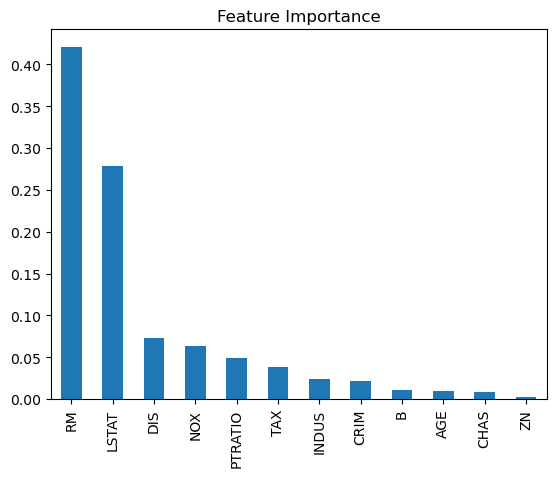

In [33]:
import xgboost as xgb
model = xgb.XGBRegressor()
train(model, x, y)
coef = pd.Series(model.feature_importances_, x.columns).sort_values(ascending=False)
coef.plot(kind='bar', title='Feature Importance')
